In [56]:
import radiant as rad
import numpy as np

In [57]:
def get_derivative_label(m):
    if m is None:
        return r"$\phi$"
    elif isinstance(m, int):
        subscript = str(m)
    else:
        subscript = ','.join([f"{i}" for i in m])
    return r"$\frac{\partial \phi}{\partial x_{" + subscript + r"}}$"

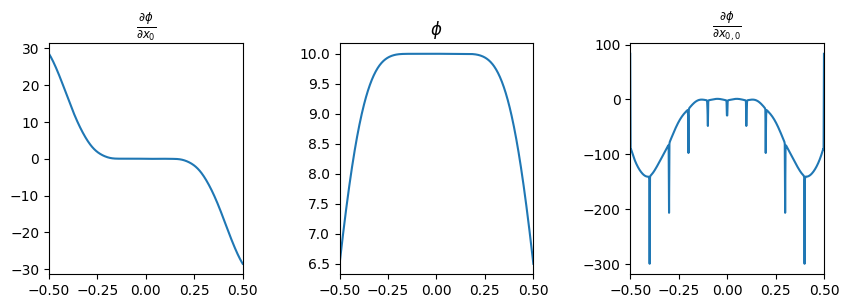

In [58]:
a = -0.5
b = 0.5

d = 1
k = 2
delta = 0.5

ranges = ((a, b),) * d
xc = rad.gridn(ranges, 11)
phi = rad.Wendland(d, k, delta, xc)

funcs = [lambda *x, m=i: phi.reduce(*x, m=m) for i in phi.allowed_derivatives]

rad.plot.spread(
    ranges,
    *funcs,
    n=500,
    ncols=3,
    wspace=0.5,
    hspace=0.5,
    titles=[get_derivative_label(m) for m in phi.allowed_derivatives],
    figsize=(10, 3)
)